In [ ]:
!pip install trimesh numpy matplotlib

🚗 Procesando modelo de auto: LowPolyCar.obj...

📊 Propiedades del modelo LowPolyCar.obj:
  formato: .obj
  num_vertices: 414
  num_caras: 448
  tiene_normales: True
  tiene_texturas: True
  tiene_materiales: True
  vertices_duplicados: True
  volumen: 58.184466218484594
  centro_masa: [2.3983018661704203, 1.6335892336533455, -2.0948048350085924]
🔄 Generando visualización 3D del modelo...


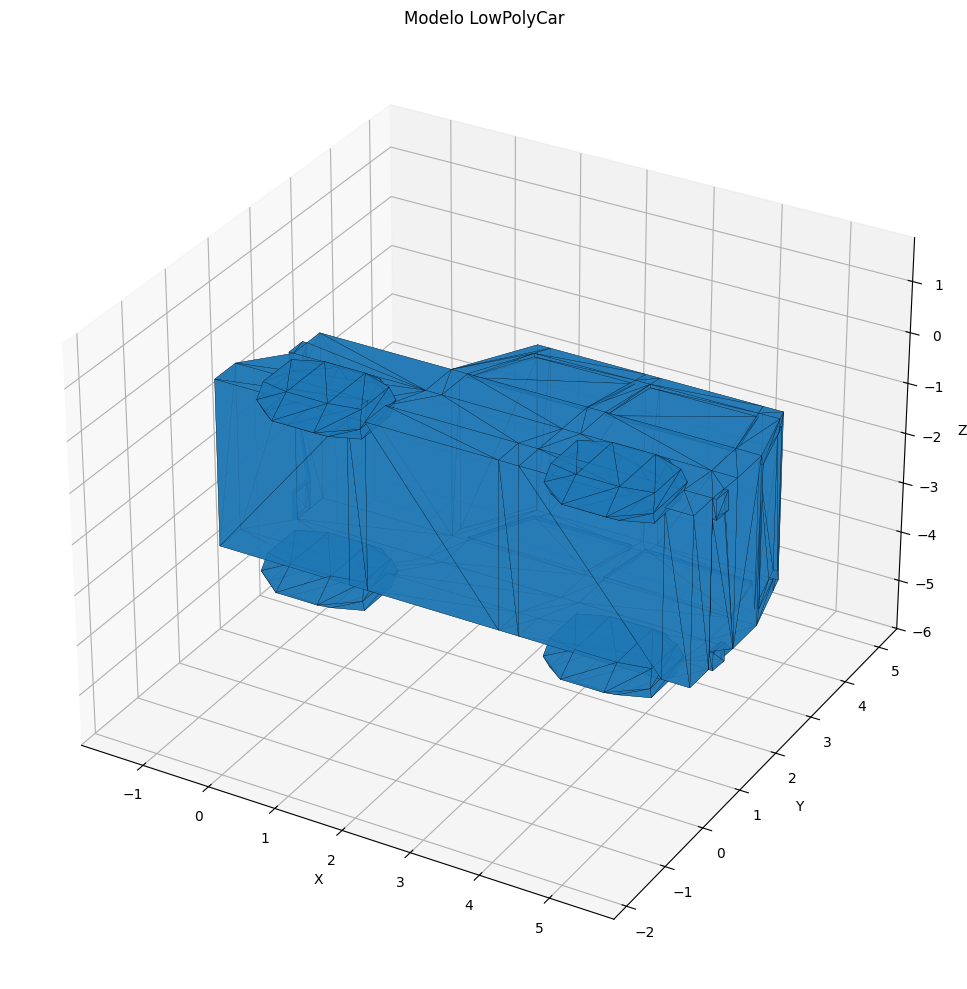


📦 Convirtiendo modelo a diferentes formatos...
✅ Modelo convertido y guardado en: LowPolyCar_convertido.stl
✅ Modelo convertido y guardado en: LowPolyCar_convertido.gltf

🔄 Realizando comparación de modelos...

🔍 COMPARACIÓN DE MODELOS 3D
Propiedad            | LowPolyCar.obj      
------------------------------------------
formato              | .obj                 | 
num_vertices         | 414                  | 
num_caras            | 448                  | 
tiene_normales       | True                 | 
tiene_texturas       | True                 | 
tiene_materiales     | True                 | 
vertices_duplicados  | True                 | 
volumen              | 58.184466218484594   | 

✅ Procesamiento completado con éxito!


In [6]:
"""
Herramienta para el procesamiento y análisis de modelos 3D
Enfocado en el análisis del modelo LowPolyCar.obj
"""

# Instalación de dependencias necesarias
!pip install trimesh numpy matplotlib

# Importación de bibliotecas
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import os
from pathlib import Path


class Model3DProcessor:
    """Clase para procesar y analizar modelos 3D"""

    def __init__(self, file_path):
        """Inicializa el procesador con la ruta del archivo"""
        self.file_path = file_path
        self.mesh = None
        self.properties = None
        self._load_model()

    def _load_model(self):
        """Carga el modelo 3D y extrae su geometría"""
        try:
            loaded = trimesh.load(self.file_path)

            # Extraer la malla del modelo
            if isinstance(loaded, trimesh.Scene):
                if not loaded.geometry:
                    raise ValueError("La escena no contiene geometría")
                self.mesh = trimesh.util.concatenate(tuple(loaded.geometry.values()))
            else:
                self.mesh = loaded

            # Analizar propiedades una vez cargado
            self._analyze_properties()
        except Exception as e:
            print(f"Error al cargar el modelo {self.file_path}: {str(e)}")
            raise

    def _analyze_properties(self):
        """Analiza y extrae las propiedades del modelo"""
        if self.mesh is None:
            raise ValueError("No hay un modelo cargado para analizar")

        self.properties = {
            "formato": Path(self.file_path).suffix,
            "num_vertices": len(self.mesh.vertices),
            "num_caras": len(self.mesh.faces),
            "tiene_normales": self.mesh.vertex_normals is not None,
            "tiene_texturas": hasattr(self.mesh.visual, 'uv') and self.mesh.visual.uv is not None,
            "tiene_materiales": hasattr(self.mesh.visual, 'material') and self.mesh.visual.material is not None,
            "vertices_duplicados": len(self.mesh.vertices) != len(np.unique(self.mesh.vertices, axis=0)),
            "volumen": float(self.mesh.volume) if hasattr(self.mesh, 'volume') else None,
            "centro_masa": self.mesh.center_mass.tolist() if hasattr(self.mesh, 'center_mass') else None,
        }

    def show_properties(self):
        """Muestra las propiedades del modelo en la consola"""
        if self.properties is None:
            print("No hay propiedades para mostrar. Analiza el modelo primero.")
            return

        print(f"\n📊 Propiedades del modelo {os.path.basename(self.file_path)}:")
        for key, value in self.properties.items():
            print(f"  {key}: {value}")

    def export_to_format(self, output_path, file_type=None):
        """Exporta el modelo a un formato específico"""
        if self.mesh is None:
            raise ValueError("No hay un modelo cargado para exportar")

        if file_type is None:
            file_type = Path(output_path).suffix[1:].lower()

        supported_formats = ['obj', 'stl', 'gltf', 'glb']
        if file_type not in supported_formats:
            raise ValueError(f"Formato {file_type} no soportado. Formatos admitidos: {supported_formats}")

        try:
            self.mesh.export(output_path, file_type=file_type)
            print(f"✅ Modelo convertido y guardado en: {output_path}")
        except Exception as e:
            print(f"❌ Error al exportar a {file_type}: {str(e)}")
            raise

    def visualize(self, max_faces=1000, title=None):
        """Visualiza el modelo 3D usando matplotlib"""
        if self.mesh is None:
            raise ValueError("No hay un modelo cargado para visualizar")

        if title is None:
            title = f"Modelo 3D: {os.path.basename(self.file_path)}"

        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Limitar el número de caras para visualización
        faces_to_show = min(len(self.mesh.faces), max_faces)

        # Crear colección de polígonos 3D
        mesh_collection = Poly3DCollection(
            [self.mesh.vertices[face] for face in self.mesh.faces[:faces_to_show]],
            alpha=0.8,
            edgecolor='k',
            linewidth=0.2
        )

        # Agregar colección a los ejes
        ax.add_collection3d(mesh_collection)

        # Establecer límites de los ejes
        vertices = np.array(self.mesh.vertices)
        x_min, x_max = vertices[:, 0].min(), vertices[:, 0].max()
        y_min, y_max = vertices[:, 1].min(), vertices[:, 1].max()
        z_min, z_max = vertices[:, 2].min(), vertices[:, 2].max()

        # Ajustar espacio para mejor visualización
        x_range = x_max - x_min
        y_range = y_max - y_min
        z_range = z_max - z_min
        max_range = max(x_range, y_range, z_range)

        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        z_center = (z_min + z_max) / 2

        ax.set_xlim(x_center - max_range/1.8, x_center + max_range/1.8)
        ax.set_ylim(y_center - max_range/1.8, y_center + max_range/1.8)
        ax.set_zlim(z_center - max_range/1.8, z_center + max_range/1.8)

        # Configurar etiquetas y título
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)

        plt.tight_layout()
        plt.show()


def compare_models(model_paths):
    """Compara varios modelos 3D y muestra sus propiedades en formato tabular"""
    if not model_paths:
        raise ValueError("No se proporcionaron rutas de modelos para comparar")

    models = []
    for path in model_paths:
        try:
            processor = Model3DProcessor(path)
            models.append({
                'path': path,
                'processor': processor,
                'properties': processor.properties
            })
        except Exception as e:
            print(f"⚠️ No se pudo cargar {path}: {str(e)}")

    if not models:
        print("❌ No se pudo cargar ningún modelo para comparar")
        return []

    # Mostrar tabla comparativa
    print("\n🔍 COMPARACIÓN DE MODELOS 3D")
    print(f"{'Propiedad':<20} | " + " | ".join([f"{os.path.basename(m['path']):<20}" for m in models]))
    print("-" * (20 + 22 * len(models)))

    # Propiedades a comparar
    props_to_compare = ['formato', 'num_vertices', 'num_caras', 'tiene_normales',
                      'tiene_texturas', 'tiene_materiales', 'vertices_duplicados', 'volumen']

    for prop in props_to_compare:
        row = f"{prop:<20} | "
        for m in models:
            value = m['properties'].get(prop, 'N/A')
            row += f"{str(value):<20} | "
        print(row)

    return models


# Ejecutar si se llama directamente
if __name__ == "__main__":
    # Definir la ruta del modelo principal
    model_path = "LowPolyCar.obj"

    print(f"🚗 Procesando modelo de auto: {model_path}...")

    try:
        # Crear procesador para el modelo del auto
        car_processor = Model3DProcessor(model_path)

        # Mostrar propiedades
        car_processor.show_properties()

        # Visualizar el modelo
        print("🔄 Generando visualización 3D del modelo...")
        car_processor.visualize(title="Modelo LowPolyCar")

        # Convertir a diferentes formatos
        print("\n📦 Convirtiendo modelo a diferentes formatos...")
        car_processor.export_to_format("LowPolyCar_convertido.stl")
        car_processor.export_to_format("LowPolyCar_convertido.gltf")

        # Comparar con el mismo modelo (en situaciones reales, se compararía con otros)
        print("\n🔄 Realizando comparación de modelos...")
        compare_models([model_path])

        print("\n✅ Procesamiento completado con éxito!")

    except Exception as e:
        print(f"❌ Error durante el procesamiento: {str(e)}")